# Assignment link: bit.ly/fuseai3
# Assignment Questions: tiny.cc/fuseai3

# Intro to Regression

## Linear Regression for one-feature, one-output data

In [0]:
# import some of the libraries essential for numeric calculations, data manipulation, and graphs
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

First, we need some data with which we can practice Linear Regression. We will generate a data that would be useful for this without needing to worry too much about multiple `features`. We will start with a single `feature` linear regression.

### Dummy Data Generation and plotting

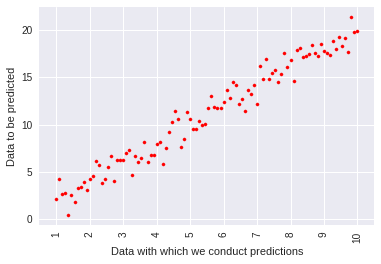

In [0]:
# Generating the data
X = np.linspace(1,10,100)
y = X*2 + np.random.randn(100)

#labelling the axes. Labels are what are written along the axis spines.
plt.ylabel('Data to be predicted')
plt.xlabel('Data with which we conduct predictions')
plt.xticks(np.arange(1,11),rotation=90)
# plotting the graph
plt.scatter(X,y,color='r',s=10)

### Building a model to fit the data

We see that the data follows a somewhat linear path. But with this sort of data, we can conduct linear regression to predict what the `Y-value` will be when the `X-value` is present. To understand what we're doing conceptually, we take note of the errors in our data. We can do this as we have artificially introduced errors into the dataset.

In [0]:
# The amount by which our present data may lie off from our fitted line
errors = y - X*2 # visualise using a bar chart, if needed

Then we plot the errors to better visualize what our data looks like

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor = LinearRegression(fit_intercept=True)

First, we split the data into our training set and out test set. We need to do this to check the accuracy of our predictive power.
Here, `X_train` and `y-train` will be the data that we use to train our model.
`X_test` and `y_test` are the subsets of the original data that we use to check if our model performed properly.

In [0]:
X_train = X[:70].reshape(-1,1) # with reshape, we convert our data from 1D to 2D as required by LinearRegression()
y_train = y[:70]

X_test = X[70:].reshape(-1,1)
y_test = y[70:]

The following code trains our linear regression model on our training data.

In [0]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

`y_pred` contains whatever value the model predicts in place of `y_test`. For the prediction, we feed the feature `X_test` into our model `regressor`.

In [0]:
y_pred = regressor.predict(X_test)

Now, we show what sort of model we built. Here, we have extracted the weight (slope) and bias (intercept) that was 'learnt' by the model. We've manually constructed the line ourselves here.

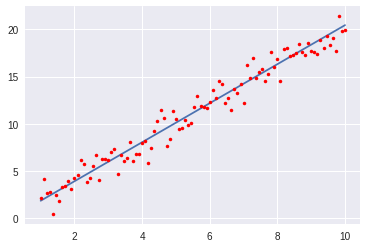

In [0]:
weight = regressor.coef_
bias = regressor.intercept_
plt.plot(X,bias + weight*X,X,y,'r.')

The model that we created is just a bunch of weights assigned to our input variables.

In [0]:
weight

array([1.90725207])

We can conduct a simple calculation to see how well our model predicts the data. We know that the model can't be prefect but we can understand how accurately our model can predict the data. Here, we use a simple metric called mean of sum of squares ( $MSE$ ) to figure our the relative error of our model. <br>

We denote `y_pred` as $\hat Y$, `y_test` as $Y$, and number of elements as $n$.

$${\displaystyle \operatorname {MSE} ={\frac {1}{n}}\sum _{i=1}^{n}(Y_{i}-{\hat {Y_{i}}})^{2}.} $$

We implement this as follows

In [0]:
MSE = (sum((y_pred - y_test)**2))/len(y_test)
print("Mean Sum of Squares:",MSE)

# using the library function
from sklearn.metrics import mean_squared_error
print("Mean Sum of Squares (using library function):",mean_squared_error(y_test,y_pred))

Mean Sum of Squares: 0.8690007505688739
Mean Sum of Squares (using library function): 0.8690007505688739


Now, we use some actual, real-world data to understand how regression works.
We will use the Boston Housing Data set. This data set uses several features of a house and the area to predict the price of a house in Boston. This data set is included in the `scikit-learn` module

# The Boston Housing Data set
The data set we built previously only contains one feature. This housing dataset contains multiple features. This means that the model should work with multiple regression coefficients and also deal with multicollinearity.

In [0]:
# first, we import the module scikit-learn with the following command
import sklearn as sk

In [0]:
# Then, we import the boston housing dataset from sklearn.
from sklearn.datasets import load_boston

Print the Description attribute that the sklearn module provides with its datasets classes. It explains what the data is, how one should go about using it and what its different feature variables represent.

In [0]:
print(load_boston().DESCR) # to print the description of the data set that we can use

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
housing = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
target = load_boston().target

In [0]:
housing = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
housing['target'] = load_boston().target
targets = load_boston().target

In [0]:
housing.describe()

We would learn a lot about the data once we visualize it. So, we follow the steps outlined in this guide for a proper start at analysis and visualization.
For this, we import a plotting library. We previously used `matplotlib.pyplot`. Now, we will use a more powerful library called `seaborn` which is built on top of `matplotlib`. But before that, we attempt to analyze the data.

In [0]:
# Establish preliminary correlations
pearson_corr = housing.corr(method='pearson')
corr_target = pearson_corr.iloc[-1][:-1].sort_values(ascending=False)
corr_target

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

In [0]:
corr_target[abs(corr_target).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

In [0]:
# correlations between features
corr_without_target = pearson_corr.iloc[:-1,:-1]
# threshold = 0.5 # correlations smaller than this aren't recorded

# significant_corr = dict()

# for rows in corr_without_target.keys():
#   for cols in corr_without_target[rows].keys():
#     if((rows is not cols) and (corr_without_target[rows][cols] >= threshold)):
#       significant_corr[rows,cols] = corr_without_target[rows][cols]
# print(significant_corr)

In [0]:
import seaborn as sns

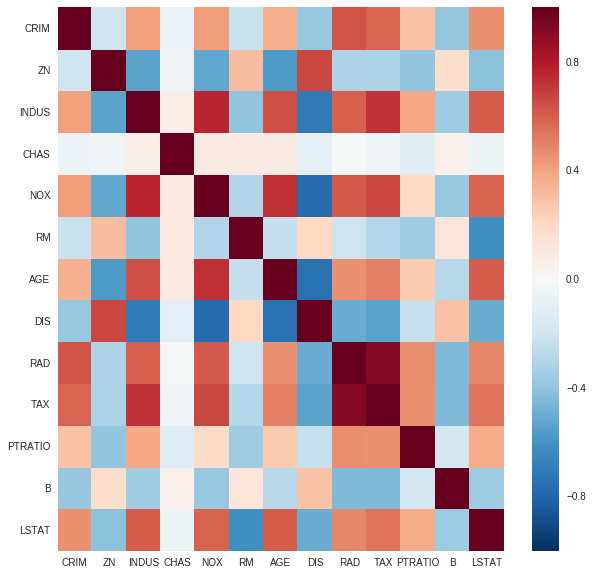

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_without_target,ax=ax)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


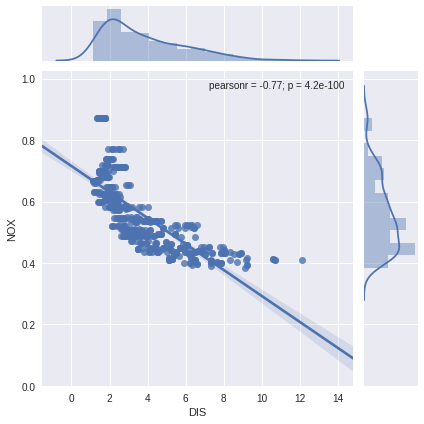

In [0]:
sns.jointplot(housing.DIS, housing.NOX, kind='reg')

When the data contains features that are highly correlated, better results will be produced if those correlations are controlled for by proper feature selection. Ideally, we would want completely independent features to build our model.

In [0]:
# The following function does what we manually did to split the data earlier
from sklearn.model_selection import train_test_split

In [0]:
housing_without_targets = housing.drop('target',axis=1)
X_train, X_test, y_train, y_test = \
    train_test_split(housing_without_targets, targets, test_size = 0.3, random_state = 1)

Alternatively, we could directly import the training features and output by using the following code:
```python
from sklearn.datasets import load_boston
housing = load_boston().data
targets = load_boston().target
X_train, X_test, y_train, y_test = train_test_split(housing, target)
```

Then, we import the LinearRegression function from the `sklearn.linear_model` module

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
regressor = LinearRegression(fit_intercept=True)

In [0]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
# Then, we calculate the error in our prediction to test how well the model performs using the MSE or the mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
print("Mean squared error with LinearRegressor(): \n",mean_squared_error(y_test, y_pred),
      "\nOur model explains {:.1f}".format(
r2_score(y_test,y_pred)*100)+"% of our data")

Mean squared error with LinearRegressor(): 
 19.831323672062922 
Our model explains 78.4% of our data


## Overfitting and Underfitting
While building a model, it is important to check whether the model performs well. This means that the model must be able to generalize beyond the present training data. To do this, the model must capture the actual structure of the data well enough. It must be able to ignore the noise in the data.
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)
[The documentation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) has a more elaborate description.
***
**_Important_**

Bear in mind that you do **NOT** have to completely understand the following code. The main goal of the following section is to understand the concept of overfit/underfit graphically. You may, however, use the code to understand how a polynomial fit might work. 
***

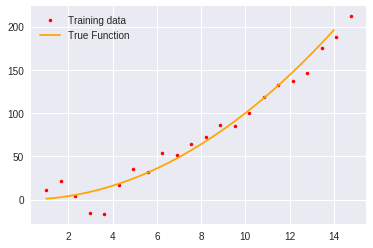

In [0]:
# for a function f(x):
def f(x):
  """This is the true function. This is what the model must predict.
  The rest is just noise that the model must ignore.
  You may try out different functions with Range(1,20).
  Change the returned expression to any other polynomial function."""
  return x**2
# let's understand this problem with a trivial dataset
# create a random dataset that would fit to a polynomial regressor
X = np.linspace(1,20,30)
y = f(X) + 15*np.random.randn(30)

# split the train and test data

X_train,X_test,y_train, y_test = train_test_split(X,y,shuffle=False)

# plot the data
plt.plot(X_train,y_train,'r.',label = 'Training data')
#True function plot
plt.plot(np.linspace(1,14),f(np.linspace(1,14)),label='True Function',c='orange')
plt.legend()

### Underfitting
The following is how our model might actually underfit when using a linear model on a non-linear dataset

In [0]:
reg = LinearRegression(fit_intercept=True)

In [0]:
# we can try to fit a LinearRegression function on this
reg.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'MSE on train: 299.9558562830046\nMSE on test: 9725.433102678162')

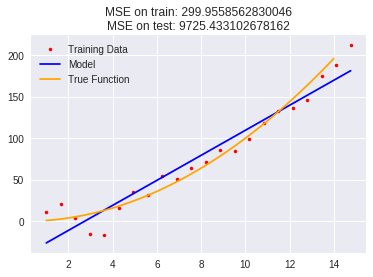

In [0]:
# data that the model predicts
y_pred = reg.predict(X_test.reshape(-1,1))

# plotting the model
# data looks like this
plt.plot(X_train,y_train,'r.',label = 'Training Data')

# our fitted line in 2D looks like this
plt.plot(X_train,reg.predict(X_train.reshape(-1,1)),label='Model',c='blue')
plt.plot(np.linspace(1,14),f(np.linspace(1,14)),label='True Function',c='orange')
plt.legend()
plt.title(
    label = "MSE on train: {}".format(mean_squared_error(y_train,reg.predict(X_train.reshape(-1,1)))) + 
    "\nMSE on test: {}".format(mean_squared_error(y_test,y_pred))
)

We can control the underfit by introducing a polynomial model.

Text(0.5, 1.0, 'MSE on training data: 203.71903115552306\nMSE on test data: 243.3369460445794')

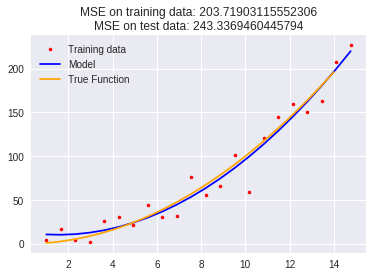

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
reg = LinMod.LinearRegression()
X_trans = poly.fit_transform(X_train.reshape(-1,1))
reg.fit(X_trans,y_train)

# plotting the polynomial fit
y_pred = reg.predict(poly.fit_transform(X_test.reshape(-1,1)))
plt.plot(X_train,y_train,'r.',label='Training data')
plt.plot(X_train, reg.predict(X_trans),c='blue',label='Model') # polynomial fit represented by blue line

# True Function
plt.plot(np.linspace(1,14),f(np.linspace(1,14)),label='True Function',c='orange')
plt.legend()

plt.title(
    label = "MSE on training data: {}".format(mean_squared_error(y_train,reg.predict(poly.fit_transform(X_train.reshape(-1,1))))) +
    "\nMSE on test data: {}".format(mean_squared_error(y_test,reg.predict(poly.fit_transform(X_test.reshape(-1,1)))))
)


### Overfitting

Text(0.5, 1.0, 'MSE on training data: 152.77581151311986\nMSE on test data: 905922661054198.9')

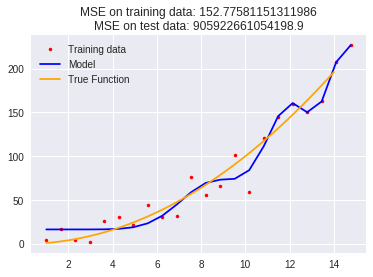

In [0]:
poly = PolynomialFeatures(20)
reg = LinMod.LinearRegression()
X_trans = poly.fit_transform(X_train.reshape(-1,1))
reg.fit(X_trans,y_train)

weights = reg.coef_
bias = reg.intercept_

# plotting the polynomial fit
y_pred = reg.predict(poly.fit_transform(X_test.reshape(-1,1)))
plt.plot(X_train,y_train,'r.',label='Training data')
plt.plot(X_train, reg.predict(X_trans),c='blue',label = 'Model') # polynomial fit represented by blue line

# True Function
plt.plot(np.linspace(1,14),f(np.linspace(1,14)),label='True Function',c='orange')
plt.legend()

plt.title(
    label = "MSE on training data: {}".format(mean_squared_error(y_train,reg.predict(poly.fit_transform(X_train.reshape(-1,1))))) +
    "\nMSE on test data: {}".format(mean_squared_error(y_test,reg.predict(poly.fit_transform(X_test.reshape(-1,1)))))
)


### Review the concept of Bias and Variance Tradeoff
While constructing models, one must be wary of neither underfitting nor overfitting their data. The problems of capturing the structure while ignoring the noise to make sure that we have a low-bias, low-variance model is key to preparing an optimal model. [Read more here.](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

## Regularization


All of the following algorithms have their own specific strengths and weaknesses. The above documentation has all the math-y details if you want to read more.

Here's [a comprehensive guide](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/) to understanding regularization.

Now, we can try out other Regression Methods from the sklearn library.

- LASSO Regression
- Ridge Regression
- ElasticNet

We could also look into other error metrics available

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
# Reload the required data into dataframes

### Data Preparation

In [0]:
column_names = load_boston().feature_names
housing = pd.DataFrame(load_boston().data, columns = column_names)
target = load_boston().target
# housing.head()

X_train, X_test, y_train, y_test = train_test_split(housing, target, random_state=10,test_size=.3)

### L1-Regularization

In [0]:
# importing the required regression algorithm
from sklearn.linear_model import Lasso

# learning
regressor = Lasso(alpha = .0001)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

# understanding error
print("Mean squared error with Lasso(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Lasso(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Lasso(): 
 29.32914811480178
Mean absolute error with Lasso(): 
 3.7070871687603124


### L2-Regularization

In [0]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha = .0001)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with Ridge(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with Ridge(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with Ridge(): 
 29.326665438393704
Mean absolute error with Ridge(): 
 3.7071255572110444


### L1- and L2-Regularization together

In [0]:
from sklearn.linear_model import ElasticNet

regressor = ElasticNet(alpha = .0001, l1_ratio = 1)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

print("Mean squared error with ElasticNet(): \n",mean_squared_error(y_test, y_pred))
print("Mean absolute error with ElasticNet(): \n",mean_absolute_error(y_test, y_pred))

Mean squared error with ElasticNet(): 
 29.350995196512553
Mean absolute error with ElasticNet(): 
 3.7072788300672572


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
